# Homework 04 - STA130
### Andrew Pols - 3 October, 2024

___

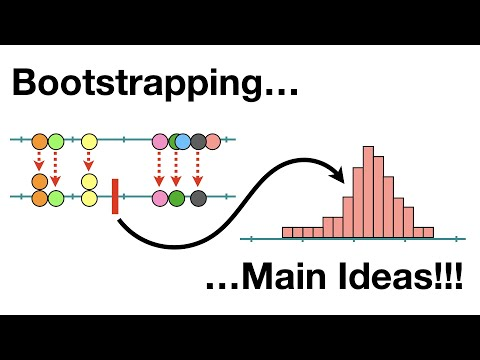

In [1]:
# Pre-lecture video

from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

___

# 1. Standard Error of Mean (SEM) vs. Standard Deviation

As the video suggests, and the course-wiki highlights, a bootstrapped distribution is just the simulation of many samplings of a population, where we can take a statistic of these samples and apply them to a given distribution. In this case, the sample means can be plotted onto a distribution. 

<br>

The Standard Error of Mean (SEM) of this distribution is a measure of the confidence that a given sample mean is an accurate representation of the population mean; that is, the lower the SEM, the more confident one can be in estimating the population mean to be equal to the sample mean.

<br>

On the connection of Standard Deviation, there are two distirbutions to consider:

1. The original population's distirbution and Standard Deviation
   - This is a measure of the spread of the data around the population mean.
   - Intuitively, it is how variable the data is near the mean; the lower the standard deviation, the lower the variability of the given distirbution, and thus, the more certain one can be in their estimates.
   
   <br>
   
2. The bootstrapped distirbution and its Standard Deviation.
    - The standard deviation of the bootstrapped distribution does something quite different — instead of measuring the "spread" of data, it measures how "variable" the sample means are after completing many iterations of sampling.
    - The higher this "spread," the less confident we can be that a given sample mean accurately reflects the population. 
    - Notice the connection between standard deviation of the bootstrapped distribution and the sample mean:
        - The Standard Deviation of the sample mean is a good estimate on the Standard Error of Mean of a sample.
        
<br>

In summary, we see that the Standard Deviation of original data is a measure of the **population's** spread about the mean, while the Standard Error of mean is a measure of the **confidence** that a given **sample** is an accurate representation of the mean. Standard Deviation is calculated from the original data, while SEM is calculated from the bootstrapped distribution.


__

### NotebookLM Summary of Interactions:

### Summarizing the Difference Between Standard Deviation and Standard Error

The **standard deviation** is a measure of how much the individual data points in a sample vary, or are spread out, around the mean of that sample. A large standard deviation means the data points are spread out far from the mean, and a small standard deviation means the data points are clustered close to the mean. 

**Bootstrapping** is a statistical technique used to estimate how much a sample statistic, such as the mean, would vary if you could take many samples from the same population. In bootstrapping, you create many new samples, called bootstrap samples, by randomly selecting data points from the original sample, with replacement. For each bootstrap sample, you calculate the sample statistic, such as the mean. The **standard error of the mean** is an estimate of how much the sample mean would vary across those different samples from the population.  The standard deviation of the distribution of bootstrap sample means is what the "Pre-lecture" video [from our conversation history] refers to as the "standard error of the mean".  The sources do not specify if the standard deviation of the distribution of bootstrapped sample means is conceptually exactly the same as the standard error of the mean.

Essentially, the standard error of the mean tells you how precise your estimate of the population mean is, based on your single sample. A small standard error of the mean indicates that if you were to take many samples from the population, the sample means would be close together, and your original sample mean is likely close to the true population mean.

The standard error of the mean is affected by two factors: the variability of the individual data points in your original sample, as measured by the standard deviation, and the size of the original sample. If the original sample has a high standard deviation, the standard error of the mean will be higher.  This is because more variability in the original sample leads to more variability in the sample means of the bootstrapped samples.  If the original sample size is large, the standard error of the mean will be smaller.  That's because a larger original sample leads to a more precise estimate of the population mean, and thus less variability in the sample means of the bootstrapped samples. 

___

# 2. SEM and 95% Confidence Intervals

First, we must recall an important statistical concept where we recognize that  within $\pm$ 2 std of a normal distribution, approximately 95% of the data points are covered, as seen in the image below. 

We can apply this concept to the bootstrapped distribution by determining the Standard Error of Mean. Recall from Q.1 that this, in a way, is the "standard deviation" of the sampled means in this bootstrapped distribution. Then, we see that 95% of the bootstapped data points lie within $\pm$ 2 SEM. 

From this, we can conclude that 95% of the sample means of this simulation lie within this interval of $(\bar{x} - 2s, \bar{x} + 2s)$.

Conceptually, this is **NOT** saying that we are 95% confident that a parameter lies in an interval or not; the parameter either lies in that interval or doesn't. Rather, we are saying that 95% of the time we construct a confidence interval, we can be reasonably confident that the true population parameter exists within that interval.

In summary, confidence intervals are calculated by the sample mean plus/minus 2 times the standard error.

In [2]:
from IPython.display import Image
Image(url = 'https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_empirical-rule.jpg')

__

### NotebookLM Summary of Interactions:


### Creating a 95% Confidence Interval Using the Standard Error of the Mean

The "Pre-lecture" video you mentioned briefly touches upon using the "standard error of the mean" to create a confidence interval, but doesn't explicitly explain the procedure.  Here's how you can construct a 95% confidence interval using this approach:

**1. Calculate the Standard Error of the Mean (SEM):**
The SEM is calculated by dividing the standard deviation (s) of the original sample by the square root of the sample size (n): 
  SEM = s / √n.  This formula is based on the assumption that your sample is independent [].  The SEM quantifies the variability of the sample means in the bootstrapped sampling distribution.

**2. Apply the "Plus/Minus 2 SEM" Rule:**
For a 95% confidence interval, you can use the approximate rule of adding and subtracting two times the SEM from the sample mean (x̄):

   * **Lower Bound:**  x̄ - (2 * SEM)
   * **Upper Bound:**  x̄ + (2 * SEM)

**Explanation:**

The idea behind this method is based on the Central Limit Theorem (CLT), which, as mentioned in the sources, is beyond the scope of your course []. However, it essentially states that the distribution of sample means tends to approximate a normal distribution as the sample size increases. In a normal distribution, approximately 95% of the values lie within two standard deviations of the mean. 

**Limitations:**

This "sample mean plus and minus about 2 times the standard error" approach is an approximation and might not cover precisely 95% of the bootstrapped sample means, especially for small sample sizes or non-normal populations [].  The sources emphasize a simulation-based perspective and encourage understanding sampling distributions through bootstrapping [].  Bootstrapped confidence intervals, as detailed in the sources, offer a more accurate and robust way to estimate confidence intervals, particularly for smaller sample sizes or when the population distribution is unknown. 

___

# 3. Bootsrap Distribution and Confidence Intervals

Given a bootstrap distribution of sample means, it is intuitive to think of a 95% confidence interval with a lower bound at the 2.5 percentile mark and an upper bound at the 97.5 percentile mark. Between these upper and lower bounds, we obtain our desired 95% interval of this distribution, as needed.



We can achieve this by using `numpy` functions to filter the lower and upper bounds based on percentiles:

- Lower Bound: `np.quantile(bootstrapped_means, 0.025)`
- Upper Bound: `np.quantile(bootstrapped_means, 0.975)`

Below is a visualization of this using Python.

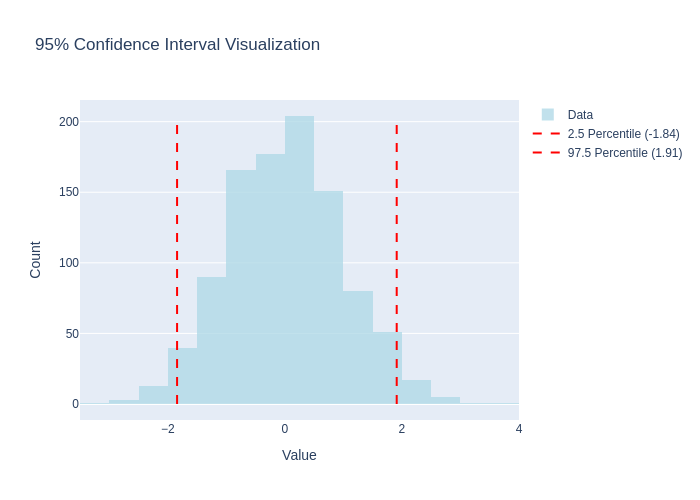

In [3]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

# Sample data
np.random.seed(42)
data = np.random.normal(0, 1, 1000)

# Calculate the 2.5 and 97.5 percentiles (for a 95% confidence interval)
lower_bound = np.quantile(data, 0.025)
upper_bound = np.quantile(data, 0.975)

# Create histogram of the data
hist = go.Histogram(
    x=data,
    nbinsx=30,
    marker=dict(color='lightblue'),
    name='Data',
    opacity=0.75,
)

# Create lines for the confidence interval
lower_bound_line = go.Scatter(
    x=[lower_bound, lower_bound],
    y=[0, 200],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name=f'2.5 Percentile ({lower_bound:.2f})',
)

upper_bound_line = go.Scatter(
    x=[upper_bound, upper_bound],
    y=[0, 200],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name=f'97.5 Percentile ({upper_bound:.2f})',
)

# Layout
layout = go.Layout(
    title='95% Confidence Interval Visualization',
    xaxis=dict(title='Value'),
    yaxis=dict(title='Count'),
    showlegend=True
)

# Combine plots
fig = go.Figure(data=[hist, lower_bound_line, upper_bound_line], layout=layout)

# Show figure

fig.show(renderer = 'png')


__

## NotebookLM Session Summary

### Quantiles and Confidence Intervals: Getting to the Core

You want to understand how **quantiles** connect to **confidence intervals**, and you specifically asked to leave out any side discussions about functions like `np.percentile`. Let's focus on the core concept:

*   **Quantiles** are points in a dataset that divide the data into equal parts. For example, the 25th percentile (or 0.25 quantile) is the value where 25% of your data falls below that value.
*   **Confidence intervals** give you a range where you're reasonably confident a population parameter (like the population mean) is located. You can think of it as an attempt to estimate a population parameter based on a sample. 

**The Connection:**

You use quantiles from a special distribution you create to determine the boundaries of your confidence interval.  This special distribution isn't your original dataset; it's a distribution of a statistic (like the mean) calculated from many resampled versions of your original data. This resampling process is called **bootstrapping** (as discussed in  and ).

**Here's how it works:**

1.  You have a sample of data and want to estimate a population parameter (e.g., the population mean).

2.  You resample from your sample many times *with replacement* (this is bootstrapping).  Each time, you calculate the statistic you're interested in (e.g., the mean) for the resampled data.

3.  This process gives you a distribution of bootstrapped statistics. 

4.  To create a 95% confidence interval, you would find the 2.5th percentile and the 97.5th percentile of this distribution. These two percentiles become the lower and upper limits of your confidence interval. The sources emphasize this method for constructing confidence intervals in multiple places, particularly in  and .

**In essence:** You're using quantiles from your bootstrapped distribution to define a range where you're fairly certain the true population parameter lies. This range is your confidence interval. 

___

# 4. 95% Confidence Intervals for Other Population Parameters

Below is code used to create a 95% confidence interval for the following parameters:
- mean
- median
- var
- std

Simply change the `param` variable to the desired value to see each example. A histogram of a randomized dataset is also provided to help visualize the 95% Confidence Interval.

95% Bootstrap Confidence Interval for the Mean: [95.76, 101.05]


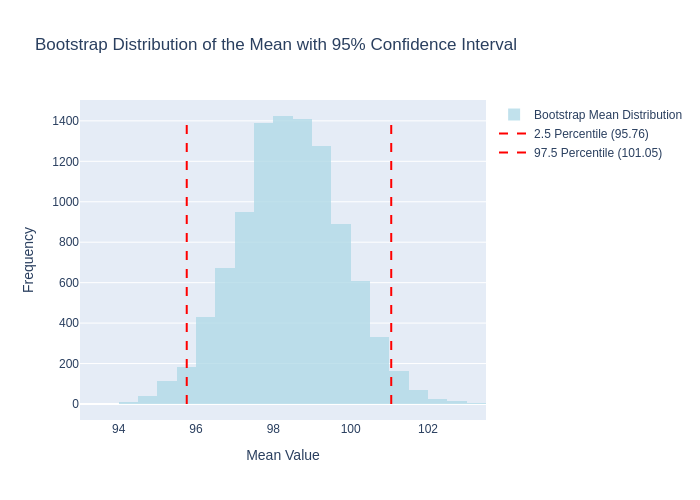

In [4]:
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

# Sample data
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=100, scale=15, size=100)  # Sample of 100 values

# Number of bootstrap samples
n_bootstrap = 10000

# Set the statistic parameter
param = "mean"  # Change to "median", "var", or "std" for other statistics

# Dictionary to map the param value to corresponding numpy functions
param_func = {
    "mean": np.mean,
    "median": np.median,
    "var": np.var,
    "std": np.std
}

# Function to compute the statistic of interest (based on param)
def bootstrap_statistic(data, param, n_bootstrap=10000):
    # Generate bootstrap samples and compute the statistic (param) for each sample
    bootstrap_samples = np.random.choice(data, size=(n_bootstrap, len(data)), replace=True)
    stat_values = np.apply_along_axis(param_func[param], axis=1, arr=bootstrap_samples)
    return stat_values

# Compute bootstrap confidence interval based on the selected param
bootstrap_values = bootstrap_statistic(sample, param, n_bootstrap=n_bootstrap)

# 95% Confidence Interval
lower_bound = np.percentile(bootstrap_values, 2.5)
upper_bound = np.percentile(bootstrap_values, 97.5)

print(f"95% Bootstrap Confidence Interval for the {param.capitalize()}: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Create histogram data to calculate the highest bin frequency
hist_data, bin_edges = np.histogram(bootstrap_values, bins=50)

# Create histogram of the bootstrap statistic values
hist = go.Histogram(
    x=bootstrap_values,
    nbinsx=50,
    marker=dict(color='lightblue'),
    name=f'Bootstrap {param.capitalize()} Distribution',
    opacity=0.75,
)

# Create lines for the confidence interval, extending to the maximum frequency
lower_bound_line = go.Scatter(
    x=[lower_bound, lower_bound],
    y=[0, 1400],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name=f'2.5 Percentile ({lower_bound:.2f})',
)

upper_bound_line = go.Scatter(
    x=[upper_bound, upper_bound],
    y=[0, 1400],
    mode='lines',
    line=dict(color='red', dash='dash'),
    name=f'97.5 Percentile ({upper_bound:.2f})',
)

# Layout
layout = go.Layout(
    title=f'Bootstrap Distribution of the {param.capitalize()} with 95% Confidence Interval',
    xaxis=dict(title=f'{param.capitalize()} Value'),
    yaxis=dict(title='Frequency'),
    showlegend=True
)

# Combine plots
fig = go.Figure(data=[hist, lower_bound_line, upper_bound_line], layout=layout)

# Show figure
fig.show(renderer='png')


__

## ChatGPT Session Summary
https://chatgpt.com/share/66fe2432-2130-800e-b16e-4ceafc8f8da3


### Summary of Interactions

1. **Bootstrap Confidence Intervals**:
   - The user requested Python code to produce a 95% bootstrap confidence interval for a population mean based on a sample. They emphasized the need for an easily changeable parameter to calculate different statistics (mean, median, etc.).

2. **Histogram Visualization**:
   - The user wanted to create a histogram to visualize the bootstrap distribution, including dashed lines for the confidence intervals that would extend to match the height of the tallest histogram bin.

3. **Finding the Tallest Bin**:
   - The user identified an error in the initial code regarding the calculation of the maximum frequency of the histogram bins. We revised the code to correctly use `np.argmax` to find the bin with the highest count and ensure that the dashed lines for the confidence intervals extended to this height.

4. **Reference to np.histogram2d**:
   - The user referenced a Stack Overflow post about using `np.histogram2d` to find the highest count bin. We clarified that our focus was on a 1D histogram and adapted the code accordingly to ensure accuracy.

5. **Final Code Implementation**:
   - The final code included the creation of a histogram for bootstrap values, the proper display of confidence intervals, and printing the range and count of the highest bin, ultimately meeting the user's visualization requirements.

___

# 5. Confidence Intervals: Population Parameters and Sample Statistics

First, we must make a distinction between population parameters and sample statistics.

- Population parameters are characteristics that are factually true, and used to describe a population. However, without engineering the population manually, these parameters are unkown to us.
- Population parameters are denoted by Greek letters.
    - e.g. Mean ($\mu$), Standard Deviation ($\sigma$).
    
<br> 
 
- On the other hand, sample statistics are derived from sampled **intervals** of the population, aiming to be an ***estimate*** of the corresponding population parameters. That is, these sample statistics are likely not the exact population parameter, but they provide an idea of what the population parameters might be.
- Sample statistics are denoted by mathematical symbols:
    - e.g. Sample Mean ($\bar{x}$), Sample std ($s$).
    
<br>

The important disctinction here is that we use sample statistics as an estimator of what a population parameter might be through the use of confidence intervals derived from a bootstrapped distribution of samples. Also, it is incredibly important to recognize that we are ***NOT*** saying that, given a 95% confidence interval based on a collection of sample statistics, we are 95% confident that the true population parameter lies within this interval. Rather, it is more correct to say that, when repeating the bootstrapping procedure many times, 95% of the confidence intervals constructed will contain the true parameter.

Thus, we can say that a confidence interval is more concerned in making inferences over the **procedure** of sampling and bootstrapping to make an estimate of the parameters, rather than being concerned over a specific interval and the "probability" (this is a misconception — either the interval contains the parameter or it doesn't) that a parameter is captured by a confidence interval.

For example, if we were to analyze a population of student heights in a school, there would be no way for us to survey every student for their height and find a population mean. So, we search for samples of this population of students and figure out a sample mean. We do this enough times until we get a bootstrapped distribution with a 95% confidence interval. Then, we repeat this procedure until we have 100 confidence intervals. We can then say, with 95% confidence, that 95 of those intervals capture the true population mean (assuming good sampling techniques, data collection, etc.).

__

## NotebookLM Session Summary


*   **Population Parameters:**  These are the true, but usually unknown, values that describe a characteristic of an entire population. Think of it like trying to find the average age of *every single person* in Canada. It's a massive task!
*   **Sample Statistics:** Since it's often impossible to measure an entire population, we take a smaller, representative group called a sample. Sample statistics are values calculated from this sample and are used to *estimate* the corresponding population parameters. For example, you might survey 1000 randomly selected Canadians and calculate *their* average age. 
*   **Confidence Intervals and Uncertainty:** Confidence intervals help us quantify the uncertainty that comes with using a sample statistic to represent a whole population. They provide a range, based on our sample data, where we're reasonably sure the true population parameter lies.

**Why is the Distinction Important?**

Think about it this way: if you only look at your sample statistic (the average age of those 1000 Canadians), you might be tempted to believe that's the *exact* average age for *all* Canadians. But that's likely not true! Confidence intervals remind us that different samples will give us slightly different estimates. The interval acknowledges this variability and gives us a range of plausible values for the actual population parameter.

**Remember the Key Point:** We use sample statistics to *estimate* population parameters, and confidence intervals help us express the uncertainty involved in that estimation process.

You also had some questions about the correct way to phrase confidence interval interpretations. To summarize:

*   **Incorrect:** "I am 95% confident that the true parameter lies within *this specific* confidence interval."

    *   Once an interval is calculated, the population parameter is either in it or not.  It's not about the probability of that *single* interval being correct.
*   **Correct:** "We can be 95% confident that the interval calculated using this *method* contains the true population parameter." 

    *   The 95% confidence level refers to the long-term success rate of the *procedure* we're using (like bootstrapping). If we repeat the process many times, we'd expect about 95% of the intervals we create to contain the true parameter.

___

# 6. Conversational Explanations of Statistical Bootstrapping

***Note: No ChatBots used for this Q***.

For someone with little-to-no experience in Statistics (or any subject, for that matter), I find the best form of explanation to be that of analogy.

- ## 1. What is the process of bootstrapping?
    
    <br>
    
    - Imagine a farmer had a large rotation of corn for the upcoming Autumn season, and this specific rotation was too numerous to go out and count every last ear of corn and weigh them. So, instead, he goes out and collects a batch of this harvest and weighs each ear of corn of each sample. He/She then takes many samples solely from this batch. It should be noted that each sample taken is independent of previous samples, but each sample contains the same number of items; this is known as sampling with replacement, which allows for duplicates of pieces of corn so we don't end up with the same samples everytime.
    
    - After weighing each item, he calculates the mean of each sample. Eventually, he has a bunch of sample means for each sample, and he calculates the mean of those sample means. So, the farmer now has the "average" sample means of his yield, along with all of the other calculated sample means. 
    
    - This farmer is also a stastician, so he organizes these statistics into a histogram which plots the frequency of data points within data ranges (essentially, range of weight vs. count of data points in this range). 
    
    - This is the process of bootstrapping: repetitive sampling (with replacement), calculating sample means, ordering sample means into a visualized histogram, and repeating this process to create multiple bootstrapped distributions.
    
    - With this, the farmer could create a 95% confidence interval, which is essentially a tool that helps estimate where the true population parameter lies (e.g. the mean weight of the corn). We do this by repeating the bootstrapping procedure many times, and 95% of the confidence intervals constructed will contain the true parameter. The process of using confidence intervals is discussed in 6.3.
    
    <br>
    
    - Related questions: 
        - What is the mean? The sum of all the observations divided by the number of observations; informally called the "average."
        - What does a histogram even look like? Below is an example image of a histogram. Notice how the x-axis measures ranges (called "bins") of data, while the y-axis measures how frequently those data points lie in a given range.

In [5]:
from IPython.display import Image
Image(url = 'https://mammothmemory.net/images/user/base/Maths/Graphs/Other%20Graphs%20Charts%20and%20Diagrams/example-1-of-a-histogram-showing-maths-test-results.95018bb.jpg')

- ## 2. What is the main purpose of bootstrapping?

    <br>

    - As highlighted in 6.1, it would be unrealistic for a farmer to go out and measure every crop in his harvest, but bootstrapping allows for meaningful statistical analysis in a manageable way. As alluded to in 6.1, the farmer can get a sense of the average weight of his harvest just by taking manageable samples. Not only this, he can even get a range of what might be considered "reasonable" estimates of population parameters, as will be discussed in 6.3.
    
    - Also, the farmer can use these samples and the histogram in 6.1 to measure what we call variability and uncertainty. Recall how the farmer could calculate the "average" sample means of his yield. Now, if he focuses on the region of data points near that average on a histogram, we can get an idea of how the data varies around the mean:
        - If the data is relatively close to the mean, then the variability is low, and we can be more certain that a guess in this region might reflect the population mean. To take a step back from the Statistical language, we can say that if the histogram bars are more packed toward the mean, then we are more confident in that range near the mean. On the contrary, data that is more spread out gives us more uncertainty of estimating a population mean.

- ## 3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

    <br>

  - Let's say the farmer estimated that one ear of corn was 0.5 pounds. Using the process of bootstrapping, we can put into action what was described in 6.1 and 6.2. The farmer would sample a certain number of ears of corn, which we will say is 10 ears. Then, the farmer would randomly choose 10 pieces of corn from this batch, with the ability to replace and duplicate (as mentioned in 6.1). 
  
  - The farmer would create a bootstrapped distribution of the sample means of the corn weights by plotting and comparing them on a histogram by their ranges of weight and associated counts. He/she would then find the average of that distribution. We can loosely say that if his guess is in a somewhat reasonable region near the average, which we will say is 0.45 pounds, we can conclude that his estimate of 0.5 pounds was a plausible estimate of the average weight of corn in the harvest.
  
  - To formalize this, we introduce the idea of a 95% confidence interval. Without getting too technical, we can say that if the farmer were to repeat this procedure many times over, we could call his hypothesized guess plausible if it falls under about 95% of the intervals for each bootstrapped distribution. Constructing this confidence interval would be too far out of the scope of this conversation with my friend, but visually looking for a reasonable range between the guess and the bootstrapped mean is sufficient enough here.
  
___

# 7. Confidence Intervals and the Null Hypothesis

For context, the null hypothesis refers to the concept that a given observation of a scenario (e.g. the effectiveness of a drug) could result to in a state of "no effect" (e.g. the drug isn't effecive).

In Question 5, we analyzed what a confidence interval was and what roles sample means and population parameters play in the analysis of a confidence interval. When considering a bootstrapped distribution with a confidence interval that includes zero, we are stating that a sample mean of zero is a ***plausible*** value of the population parameter (this is not to be confused with saying that it IS the population parameter, or that we are 95% confident it is so).

In order to reject this null hypothesis (ie. conclude that there IS some effect), we must prove that the null hypothesis is unplausable **BEYOND REASONABLE DOUBT**. Thus, if the null hypothesis is a valid estimate of the population parameter based on our confidence interval, then we can not reject it. This is not a matter of probability or likelihood, but rather saying with confidence that this value of "no effect" can or can not be disregarded. We can make this conclusion based on the notion that if a value falls out of this confidence, it is not a plausible estimate as it is deemed too much of an outlier.

**When the null hypothesis falls outside the Confidence Intevral, it implies that the population parameter (and consequently the bootstrapped means) is confidently different from the null hypothesis value.**

Alternatively, if the 95% confidence interval ***excluded*** the null hypothesis of "no effect", then we may disregard this value; that is, we may **reject the null hypothesis**. We are able to do this because of the fact that our confidence interval provides a level of certainty based on the variability of the bootstrapped distribution that values within this interval can be plausible hypotheses of the population parameters. For a given value that falls outside of this interval, we cannot plausibly say with confidence that this value can represent the population parameter, and so we reject it.

In the case of the drug example, we say that if the confidence interval includes the possibility of $\bar{x} = 0$ (that is, there is no effect), then it is entirely plausible that the population parameter **COULD** reflect this value. The mere possibility of this based on the confidence interval is enought to state the failure of rejecting the null hypothesis.

Now, if the confidence interval does not capture $\bar{x} = 0$, then we can plausibly say that this value is an "outlier" of this interval, and so we are not confident in it and reject it.

__

## NotebookLM Session Summary

*   A **confidence interval** provides a range of plausible values for a **population parameter** (like a population mean) based on a **sample statistic** (like a sample mean).
*   The **null hypothesis** typically represents "no effect (on average)", meaning the population parameter is equal to zero.
*   A 95% **confidence interval** signifies that if the sampling process were repeated many times, 95% of the resulting confidence intervals would contain the true population parameter.
*   If the confidence interval for a drug's average effect includes zero, it implies that zero is a plausible value for the true average effect in the population. This does not mean the drug has no effect; it just means there isn't enough evidence to definitively conclude that it does have an effect.
*   **Failing to reject the null hypothesis** does not prove the null hypothesis is true; it just indicates insufficient evidence to reject it.

**What would lead to "rejecting the null hypothesis"?**

If the 95% confidence interval *does not* contain zero, it suggests that zero is *not* a plausible value for the true population parameter. This would provide strong evidence to suggest that there is a real effect, leading to the rejection of the null hypothesis. 

**In summary**, a confidence interval overlapping zero means that the observed sample mean, while potentially different from zero, is not statistically different enough from zero to confidently conclude that the true population mean is not zero. This is because the variability inherent in sampling means that even if the true population mean were zero, we could still observe a sample mean different from zero due to random chance. 

___

# 8. AliTech Vaccine Data Analysis

## Problem Introduction

A company named AliTech has created a vaccine that aims to improve the health of the people who take it. The task at hand is to determine the overall "net" effect of the vaccine on its clinical trials. That is, does the drug provide an overall positive or negative effect? Perhaps, does the drug have a ***null*** effect? This is the purpose and motivation of the problem. We will go over the means in which we do so throughout the analysis.

#### What is the Null Hypothesis of "no effect" in this context?
- In this context, the null hypothesis is the idea that it is plausible that the drug could have a net zero effect on average. That is, the drug doesn't actually do anything (on average).
    
Below is a histogram and KDE of the AliTech sampling data to help visualize the current capacity of data. Through these visualization methods, we can see the comparison we seek to make between the patients of this drug and their overall medicinal benefit, detriment, or null experiences.

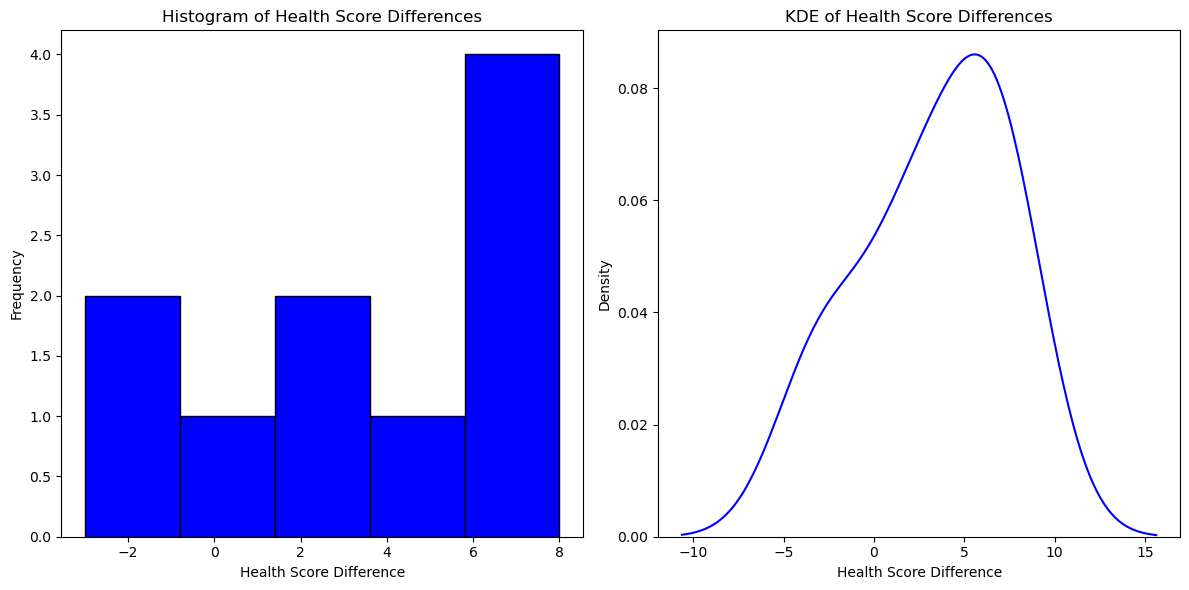

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file from the provided URL
url = 'https://raw.githubusercontent.com/andrewpols/sta130/refs/heads/main/csv_files/alitech_vaccine_data.csv'
df = pd.read_csv(url)

# Calculate the Health Score Difference
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plot Histogram and KDE of Health Score Differences
plt.figure(figsize=(12, 6))

# Plot Histogram of Health Score Differences
plt.subplot(1, 2, 1)
plt.hist(df['HealthScoreDiff'], bins=5, color='blue', edgecolor='black')
plt.title('Histogram of Health Score Differences')
plt.xlabel('Health Score Difference')
plt.ylabel('Frequency')

# Plot KDE of Health Score Differences
plt.subplot(1, 2, 2)
sns.kdeplot(df['HealthScoreDiff'], color='blue')
plt.title('KDE of Health Score Differences')
plt.xlabel('Health Score Difference')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


## Quantitative Analysis

As we can see from the above plots, there really isn't much data to be working with, which makes any quantitiative analysis difficult. In fact, there is so little data to work with here that it isn't plausible to make any quantitative observation at this point based on any data anlysis. So, we will use the procedure of bootstrapping to create distributions that reflect sample means from this dataframe. From this, we can find confidence intervals from a given bootstrapped distirbution and determine one of the following:

1. The null hypothesis can be rejected.
2. The null hypothesis cannot be rejected.

We can make these observations based on what we discussed in Q.7. If the null hypothesis ($\bar{x} = 0$) falls outside the confidence interval, we can confidently reject it, and vice versa.

The below code undergoes the procedures outlined in Questions 3 through 5, where we discuss how bootstrapped distributions are formed, and what their confidence intervals can describe. As a quick summary, we simulate through a numerous process of sampling with replacement (of sample size $n=10$ in this case, due to the 10 original patients), taking the ***sample mean of each iteration***. Then, we plot these sample means onto a distribution, where we can see the variability of this formed bootstrapped distribution, and what insights it may provide on uncertainty and confidence.

More specifically, we aim to construct a 95% confidence interval in which we make a conclusion on the overall effect of the drug, and whether or not we may reject the null hypothesis. As stated in Q7, if the confidence interval does not include the null hypothesis value, it suggests that the population mean is confidently different from that hypothesized value, further implying that the drug does have some sort of **effect**, whether it be positive or negative (which will be discussed further in the findings and discussion).

NOTE: The code below undergoes 10,000 iterations of sampling, which helps provide a more accurate bootstrapped distribution as we have more instances of sample means to verify any trends. Also note that we used the `np.random.seed()` function to make this code reproducible under different tests (...provides a way to control randomness for reproducibility).

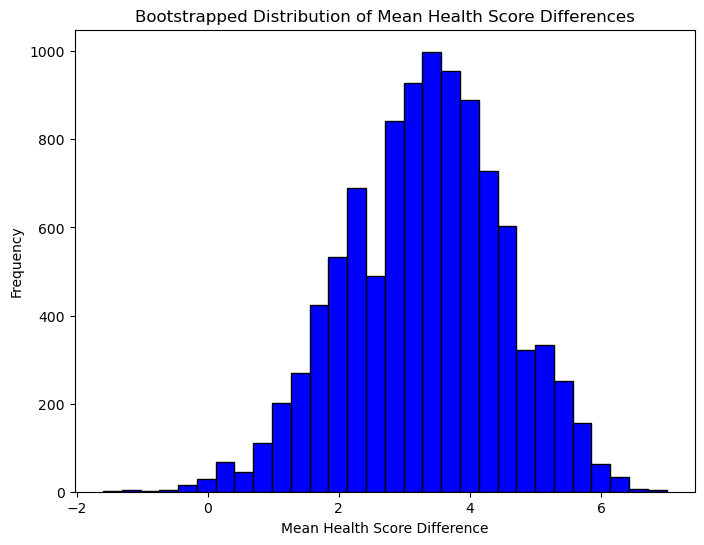

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file from the provided URL
url = 'https://raw.githubusercontent.com/andrewpols/sta130/refs/heads/main/csv_files/alitech_vaccine_data.csv'
df = pd.read_csv(url)

# Calculate the Health Score Difference
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 1: Define a bootstrapping function with reproducibility
def bootstrap_mean_diff(data, n_iterations=10000, seed=42):
    np.random.seed(seed)  # Set the random seed for reproducibility
    mean_diffs = []
    for i in range(n_iterations):
        # Resample with replacement
        sample = data.sample(frac=1, replace=True)
        # Calculate the mean of the resampled data
        mean_diff = sample['HealthScoreDiff'].mean()
        mean_diffs.append(mean_diff)
    return mean_diffs

# Step 2: Perform bootstrapping with 10,000 resamples
n_iterations = 10000
bootstrapped_means = bootstrap_mean_diff(df, n_iterations)

# Step 3: Plot the bootstrapped distribution of the mean health score differences
plt.figure(figsize=(8, 6))
plt.hist(bootstrapped_means, bins=30, color='blue', edgecolor='black')
plt.title('Bootstrapped Distribution of Mean Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')

# Display the plot
plt.show()


Great! We can now see that this distribution is somewhat normal, but more importantly, it is relatively positive! Just by visual methods, we can see that this histogram provides a general belief that the drug ***rejects*** the null hypothesis. 

**However,** we must show this ***qunatitatively*** by constructing a confidence interval and determining whether or not it is plausible to reject the null hypothesis.

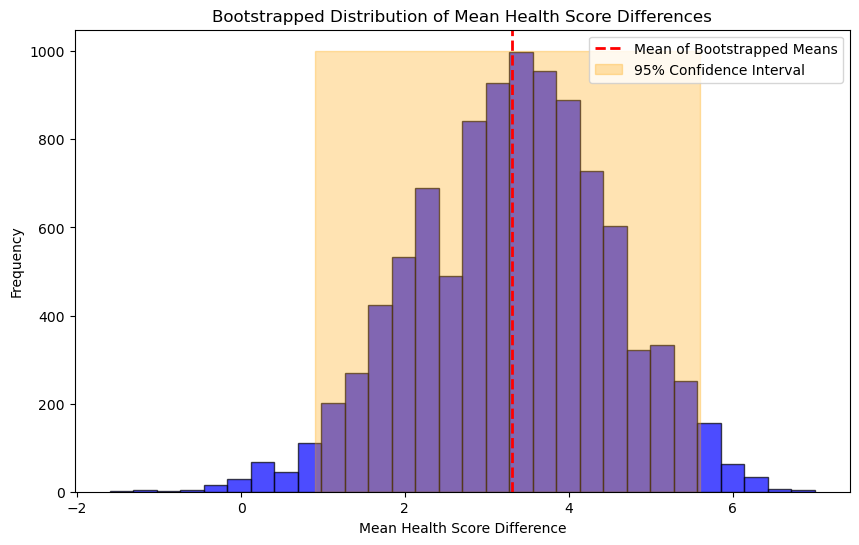

95% Confidence Interval: [0.90, 5.60]


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file from the provided URL
url = 'https://raw.githubusercontent.com/andrewpols/sta130/refs/heads/main/csv_files/alitech_vaccine_data.csv'
df = pd.read_csv(url)

# Calculate the Health Score Difference
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 1: Define a bootstrapping function with reproducibility
def bootstrap_mean_diff(data, n_iterations=10000, seed=42):
    np.random.seed(seed)  # Set the random seed for reproducibility
    mean_diffs = []
    for i in range(n_iterations):
        # Resample with replacement
        sample = data.sample(frac=1, replace=True)
        # Calculate the mean of the resampled data
        mean_diff = sample['HealthScoreDiff'].mean()
        mean_diffs.append(mean_diff)
    return mean_diffs

# Step 2: Perform bootstrapping with 10,000 resamples
n_iterations = 10000
bootstrapped_means = bootstrap_mean_diff(df, n_iterations)

# Step 3: Calculate the mean of the bootstrapped means
mean_of_bootstrapped_means = np.mean(bootstrapped_means)

# Step 4: Calculate the 95% Confidence Interval for the bootstrapped means
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

# Step 5: Plot the bootstrapped distribution of the mean health score differences
plt.figure(figsize=(10, 6))
plt.hist(bootstrapped_means, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(mean_of_bootstrapped_means, color='red', linestyle='dashed', linewidth=2, label='Mean of Bootstrapped Means')

# Add rectangle for the confidence interval
plt.gca().add_patch(plt.Rectangle((lower_bound, 0), upper_bound - lower_bound, 1000, color='orange', alpha=0.3, label='95% Confidence Interval'))

# Final plot decorations
plt.title('Bootstrapped Distribution of Mean Health Score Differences')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()

# Print the 95% Confidence Interval
print(f'95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]')

## Findings and Discussions

From the above annotated graph of the bootstrapped distributions, we can see that the sample mean $\bar{x} = 0$ falls outside of our confidence interval. 

***Thus, we can plausibly reject the null hypothesis!*** Again, to clarify, since the null hypothesis falls outside of this confidence interval, this implies sufficient analysis to reject it, as the excluded 5% interval is highly unlikely to represent the true population parameter.

Since the confidence interval (CI) is [0.90,5.60], the data provides strong evidence that the true mean health score difference is significantly different from zero. The reasoning behind this is explained in the methodology and purpose of these methods in the Quantitative Analysis (since 0 is not in our CI, we can confidently and plausibly reject its likelihood of representing the population mean).


In fact, we can actually see that the drug has an overall positive effect, as the confidence interval is composed of $\bar{x}$ values greater than 0.

#### Further Considerations

To confirm that our above conclusions are plausible, we can analyze the variability of the bootstrapped distribution, just by analyzing the confidence interval. We see below that the range of the bootstrapped means is about 8.60, while the CI range is only 4.70. This indicates a relatively low-moderate variability, and thus gives us fairly high confidence in our above conclusions (that is, the data isn't so varied to the point where it is difficult to make a conclusion). 

In [9]:
import numpy as np
import pandas as pd

# Load the CSV file from the provided URL
url = 'https://raw.githubusercontent.com/andrewpols/sta130/refs/heads/main/csv_files/alitech_vaccine_data.csv'
df = pd.read_csv(url)

# Calculate the Health Score Difference
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Define the bootstrapping function
def bootstrap_mean_diff(data, n_iterations=10000, seed=42):
    np.random.seed(seed)
    mean_diffs = []
    for i in range(n_iterations):
        sample = data.sample(frac=1, replace=True)
        mean_diff = sample['HealthScoreDiff'].mean()
        mean_diffs.append(mean_diff)
    return mean_diffs

# Perform bootstrapping
n_iterations = 10000
bootstrapped_means = bootstrap_mean_diff(df, n_iterations)

# Calculate the range of the bootstrapped means
bootstrapped_range = np.max(bootstrapped_means) - np.min(bootstrapped_means)

# Print the range
print(f'Range of the bootstrapped means: {bootstrapped_range:.2f}')

# Print the 95% Confidence Interval range
ci_range = upper_bound - lower_bound

print(f'95% Confidence Interval Range: {ci_range:.2f}')


Range of the bootstrapped means: 8.60
95% Confidence Interval Range: 4.70


__

## ChatGPT Session Summary
https://chatgpt.com/share/66ff6658-5310-800e-b90b-db367435c4aa


1. **Assignment Overview**:
   - The goal was to analyze data from AliTech's vaccine to determine its effectiveness using bootstrapping.

2. **Data and Code**:
   - Provided code to simulate patient data, save it as a CSV, and import it into Jupyter for analysis.

3. **Data Visualization**:
   - Created histograms and KDE plots to visualize health score differences and perform bootstrapping.

4. **Bootstrapping and Random Seed**:
   - Discussed the importance of using `np.random.seed()` for reproducibility and clarified its placement in the code.

5. **Confidence Intervals and Null Hypothesis**:
   - Explained how a null hypothesis falling outside the confidence interval allows for rejection, indicating a significant difference from the population parameter.

6. **Terminology Clarification**:
   - Differentiated between the population parameter (true mean) and sample mean (average from collected data).

7. **Bootstrapped Values**:
   - Provided code to calculate the range of bootstrapped values and confirmed the interpretation of confidence intervals without annotations.

8. **Final Clarifications**:
   - Reviewed the relationship between confidence intervals, variability, uncertainty, and their implications for hypothesis testing.

___

# 9. Resources Used

Yes, I've referred to the course-wiki and interacted with NotebookLM.